# Online Advertising Challenge


**Background**

Websites can make money through a variety of strategies. One of the most common is ads. Let’s say you
made a new Widget and it is fantastic! So much better than all the other widgets on the market. If you
want to show people an ad for your new Widget, you can’t just call up NYTimes.com and say you want
to show people some ads on their website; you’ll need to participate in Real Time Bidding (RTB)
markets. Real time bidding manifests as lightning fast (100 millisecond) auctions occurring at a rate of
millions per second. In order to show your Widget ads, you’re going need some seriously fast technology
to help you participate in these auctions…. In online advertising, demand-side paltforms (DSPs) use a variety of data to automatically determine whether to bid and how much. If the bid is wone at the bid auction, the ad of your widget will be shown. 


The accompanying data set contains information from thousands of auctions seen during one
week. Each row represents 1 instance of an ad being shown to a person. The “CreativeId” column
identifies which ad was showed. The “TDID” column represents which person was showed the ad to.
The special thing about this data set is all the TDIDs are from people that work or study at 1 of just 3
organizations. Two of the organizations are well known tech companies. One organization is a college.

**Tasks**

1. For the users where we’ve exposed organization information, can you guess the name of the
institution? Be prepared to defend your answer. (Hint: 2 organizations are large tech companies.
1 organization is a college).


2. For the users where we have not exposed their grouping (i.e. “???”), can you develop a model to
predict which of the 3 organizations they belong to? (i.e. build a model to predict which of the 3
organizations you think each user is associated to)


3. The tech companies are both recruiting heavily from the college campus. They want to know
which users they should prioritize in their recruiting efforts. Can you pitch us on a
method/model to prioritize users for each tech company? This doesn't have to be a formal pitch
deck, but be prepared to talk through your proposal and answer questions like: What can we get
out the door in a week or two? What if we had more time, what would your dream model look
like? Will your proposal scale?

# Data

| Column Name            | Description                                                                                                                                             |
|------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------|
| BidFeedbackId          |  unique event identifier                                                                                                                                |
| LogEntryTime           |  UTC Time we logged the impression.                                                                                                                     |
| CreativeId             |  identifier for the content of the ad shown                                                                                                             |
| TDID                   |  unique user identifier                                                                                                                                 |
| Organization           |  The organization where this user works or studies. Possible values are [1, 2, 3, “???”]. “???” means we have randomly hidden that user’s organization. |
| Browser                |  browser the user was on when the ad rendered                                                                                                           |
| AdFormat               |  Dimensions of the ad shown.                                                                                                                            |
| DeviceType             |  the device type of the user where the ad was rendered                                                                                                  |
| Frequency              |  Ignore                                                                                                                                                 |
| OS                     |  operating system of the user where the ad rendered                                                                                                     |
| OSFamily               |  operating system family of the user where the ad rendered                                                                                              |
| ReferrerCategories     |  [Description left blank on purpose.]                                                                                                                   |
| RenderingContext       |  the rendering context of the user where the ad rendered                                                                                                |
| TemperatureInCelsius   |  temperature at the time and place where the ad was served                                                                                              |
| WinningPriceCPMInBucks |  How much we paid for the impression in dollars times 1,000.                                                                                            |
| Site                   |  site where the impression was served                                                                                                                   |

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(color_codes=True)

In [2]:
# Read data
df = pd.read_csv("./DataForCandidate.txt", sep='\t')

# Dropping 'Frequency' column, as instruction say to ignore this. 
df = df.drop(['Frequency'], axis=1)

# Renaming 'Location' column in the actual data seems to be what is reffered to as 'Organization' in the instructions
df['Organization'] = df['Location']
df = df.drop(['Location'], axis=1)

df.shape

(592733, 15)

In [3]:
df.dtypes

BidFeedbackId              object
LogEntryTime               object
TDID                        int64
CreativeId                 object
AdFormat                   object
WinningPriceCPMInBucks    float64
site                       object
ReferrerCategories         object
DeviceType                 object
OSFamily                   object
OS                         object
Browser                    object
RenderingContext           object
TemperatureInCelsius      float64
Organization               object
dtype: object

In [4]:
df.head()

,BidFeedbackId,LogEntryTime,TDID,CreativeId,AdFormat,WinningPriceCPMInBucks,site,ReferrerCategories,DeviceType,OSFamily,OS,Browser,RenderingContext,TemperatureInCelsius,Organization
0,0000127c-9bad-4819-861f-61183d0118a4,2019-02-07 16:38:57.450100,4036417920015424099,tiuunfez,300x250,0.648104,300048137,NaN,Mobile,iOS,iOS121,WebView,InApp,NaN,???
1,000015a8-ff10-4ea1-90d8-7efbadd684db,2019-02-05 23:19:05.388100,5455240771184669885,gebhnrlx,728x90,1.538137,chicago.suntimes.com,NaN,PC,OSX,Other,Chrome,Other,NaN,1
2,00001acf-180a-4677-8c6b-3450b756ed8e,2019-02-01 00:44:49.239100,9054625594690950326,tw5ju0fq,300x250,5.038000,deadspin.com,"qrg,vas",PC,Windows,Windows10,Chrome,Other,12.15,???
3,00002d58-6c07-4b8d-bec9-70270a8d86dc,2019-02-05 19:10:19.002500,7591148781420240646,adzprics,728x90,0.506000,www.mathway.com,jba,PC,Windows,Windows10,Chrome,Other,NaN,???
4,00005440-1d42-4162-8ffa-ba17f3af4990,2019-02-06 22:31:18.028200,7770951076823256474,myqmyec2,300x250,0.936605,quizlet.com,"3oc,h8k,6sj,68g,qld",PC,OSX,Other,Chrome,Other,NaN,3


## Feature types

In this data we see time, categorical and numerical features. 

**Numerical**
- 'WinningPriceCPMInBucks',
- 'TemperatureInCelsius',
 
**Categorical**

- 'BidFeedbackId',
- 'TDID',
- 'CreativeId',
- 'site',
- 'ReferrerCategories',
- 'DeviceType',
- 'OSFamily',
- 'OS',
- 'Browser',
- 'RenderingContext',
 
**Convertible? (TBD)**
-  'AdFormat' --> this could be converted to numerical as well, if we parse the string and define height and width cols, but the fact that it is discreet, rather than continuous means we might be better off leaving as categorical?
- 'LogEntryTime' --> this could be converted to categorical by deriving Hour, Weekday, Month and Year. This would help the model pick up seasonality, cycles and trends from the time series nature of these columns.

In [5]:
# Define feature types

cols_num = [
 'WinningPriceCPMInBucks',
 'TemperatureInCelsius',
]

cols_cat = [
    'BidFeedbackId',
 'TDID',
 'CreativeId',
 'site',
 'ReferrerCategories',
 'DeviceType',
 'OSFamily',
 'OS',
 'Browser',
 'RenderingContext',
  # could perhaps be converted to numerical by deriving width and height cols
 'AdFormat',    
]

cols_time = [
    # could be converted to categorical by deriving year, month, week, hour, etc
     'LogEntryTime',
]

len(cols_num + cols_cat + cols_time)


14

# Task 1 - Guessing organisation name

**Question 1** - "For the users where we’ve exposed organization information, can you guess the name of the institution? (Hint: 2 organizations are large tech companies. 1 organization is a college)"

**Approach** - From the data I want to 'triangulate' possible geographical information, that enables a best guess at what the 2 tech companies and the college are. Going deeper into the data might give more hints. Below are initial thoughts on the columns, and what I would like to examine deeper.

**_Note: I didn't have time to explore each of the features, and also during cleaning and preproc step below, I dropped some of these columns to simplify things_**

- `LogEntryTime`: I want to look at event counts over time per organization. My hypothesis is that I'll see a distinct 'evening activity' peak, plus potentially a morning and lunch peak. I know that the times are all in UTC time. From this I might be able to deduce in which timezone each organization is based (e.g. East coast vs West coast in the US), the longitude. 
- `TemperatureInCelsius`: This might give information about the Latitude of the location of the organizations, depending on whether the mean/median are lower or higher. We already saw above that there are differences in the distributions across orgs.  
- `site`: The domain name could contain information on content users are interested in. For example, are many Spanish speaking website accessed? This could point to countries with a large hispanic population, like California. Or, same principle for Asian content. If very location specific websites are accessed frequently (say a local newspaper) this could point to specific regions/cities too.
- `DeviceType`, `OS`, `OSFamily`: For organizations there could be differences (Google employees more on Android phones, Apple emlpoyees on iPhones, students at the college on cheaper Android devices, etc). 
- `Browser`, `AdFormat`: I expect `Browser` to be correlated to `OS` and `AdFormat` to `DeviceType` because the Browser market is dominated by Chrome, and AdFormat depends also on the device screen size, app used, site visited, etc. This might be less related to where users are working/studying. 
- `WinningPriceCPMInBucks`: I expect this to be more independent of the organizations. A correlation plot can help answering this. 
- `ReferrerCategories`: Unknown category. Would be interesting to see if there are any correlations. I suspect this could be a categorical descriptor for the ad content or user interests (maybe codes/tags for automotive, gaming, sports, travel). 




However, before we can do the analysis, we need to prepare the data and simplify things.

## Cleaning and Preprocessing

### Outlier removal

We only look at the numerical features for this.

In [6]:
cols_num

['WinningPriceCPMInBucks', 'TemperatureInCelsius']

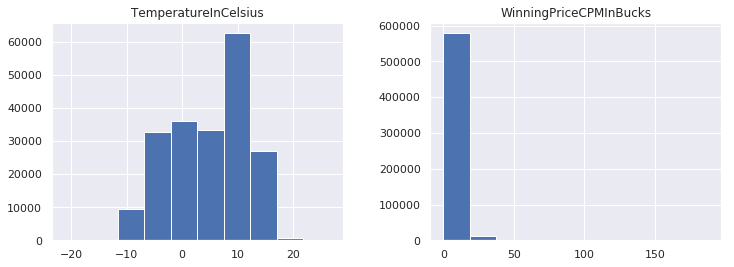

In [7]:
# Plot distributions of numerical features
df[cols_num].hist(figsize=(12, 4));

In [8]:
df[cols_num].describe()

,WinningPriceCPMInBucks,TemperatureInCelsius
count,592733.000000,201764.000000
mean,3.196716,4.882112
std,5.281044,6.666031
min,0.000000,-21.170000
25%,0.497950,-0.820000
50%,1.426000,6.980000
75%,3.686389,10.050000
max,187.590000,26.630000


* Above stats indicate we have some outliers and we should probably remove them as this can really mess up the EDA and modelling stages. 

* Due to time constrains I will remove these simply by just using the IQR (Inter Quartile Range) technique on the _whole dataset_. Note that doing it this way will introduce some **data leakage** - see Future Work section

In [9]:
# Helper function to remove outliers using IQR

def remove_outliers(df, column_name, how='iqr'):
    """
    Remove outliers in the data
    :param df: dataframe
    :param column_name: target column
    :param how: method used, default is IQR (interquartile range)
    :return: df with outlier rows removed
    """
    if how == 'iqr':
        # Using IQR * 1.5 methodology
        Q1 = df[column_name].quantile(0.25)
        Q3 = df[column_name].quantile(0.75)
        IQR = Q3 - Q1
        not_outliers_mask = ~((df[column_name] < (Q1 - 1.5 * IQR)) | (df[column_name] > (Q3 + 1.5 * IQR)))
        return df[not_outliers_mask]
    else:
        raise ValueError('No other method to remove outliers defined')

# Remove outliers for all numerical columns
# WARNING: doing this in the whole dataset will introduce data leakage into the test set
print('Original rows before outlier removal: ', df.shape)
for col in cols_num:
    n_rows_before = df.shape[0]
    df = remove_outliers(df, col)
    print('After removing outliers for {}: {}, reduction by={:.0f}%'.format(col, df.shape, (df.shape[0] - n_rows_before)*100 / n_rows_before))
            

Original rows before outlier removal:  (592733, 15)
After removing outliers for WinningPriceCPMInBucks: (536896, 15), reduction by=-9%
After removing outliers for TemperatureInCelsius: (536876, 15), reduction by=-0%


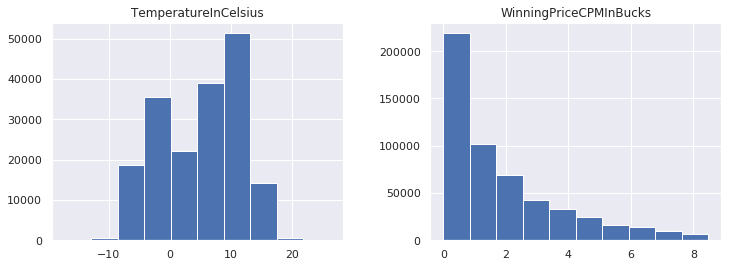

In [10]:
# Plot again to check if distributions look now better
df[cols_num].hist(figsize=(12, 4));

* Removing outliers resulted in a dataset reduction of about 9% mainly driven by `WinningPriceCPMInBucks` but now its distribution looks better for modelling, although it is clearly non-normal - it has a long tail, indicating most impressions are won with CPMs < 2


### Extracting time features

In [11]:
cols_time

['LogEntryTime']

In [12]:
# Convert to datetime type
df['LogEntryTime'] = pd.to_datetime(df['LogEntryTime'])

In [13]:
%%time

# Derive time features
df['LogEntryTime_hour'] = df['LogEntryTime'].apply(lambda x: x.hour)
df['LogEntryTime_weekday'] = df['LogEntryTime'].apply(lambda x: x.dayofweek)
df['LogEntryTime_month'] = df['LogEntryTime'].apply(lambda x: x.month)
df['LogEntryTime_year'] = df['LogEntryTime'].apply(lambda x: x.year)


CPU times: user 7.97 s, sys: 331 ms, total: 8.3 s
Wall time: 8.36 s


In [14]:
# Check uniqueness of time features
for col in [x for x in df if 'LogEntryTime_' in x]:
    print('col={}\nunique_values={}\n#####################'.format(col, sorted(df[col].unique())))
    

col=LogEntryTime_hour
unique_values=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
#####################
col=LogEntryTime_weekday
unique_values=[0, 1, 2, 3, 4, 5, 6]
#####################
col=LogEntryTime_month
unique_values=[2]
#####################
col=LogEntryTime_year
unique_values=[2019]
#####################


* From above results we see we don't gain any information from the month or year as they have a single value - all the data seems to be an extract from Feb 2019, so we can drop them


In [15]:
# Drop month and year as all data is from February 2019
df.drop(['LogEntryTime_month', 'LogEntryTime_year'], axis=1, inplace=True)


In [16]:
# Redefine time columns
cols_cat += ['LogEntryTime_hour', 'LogEntryTime_weekday']

### Reducing dimensionality of categorical features

It's always important to reduce dimensionality in categorical features due to the 'curse of dimensionality' - we are at more risk of overfitting due to the high variance this introduces.

In [17]:
# Check uniqueness of categorical features
df[cols_cat].nunique().sort_values(ascending=False)

BidFeedbackId           536876
CreativeId               34885
TDID                     26993
site                     13090
ReferrerCategories       10264
AdFormat                    43
OS                          33
LogEntryTime_hour           24
Browser                      9
LogEntryTime_weekday         7
OSFamily                     7
DeviceType                   5
RenderingContext             3
dtype: int64

Clearly we have too many unique values in some of the categorical features, so I will make the following simplications:

- **Drop:**
    - `BidFeedbackId`, `CreativeId`, `TDID`: these have too many unique values, so would add just a lot of noise and dimensionality into our model . In particular for `BidFeedbackId` every row is different, so it's just like an index
    - `site`: potentially would require a lot of cleaning to reduce dimensionality, so ignore for now
    - `ReferrerCategories`: not sure what this represents (perhaps tags?), but there`s ~20% of them missing so will remove dependance on this
    - `OS`: we will be using `OSFamily` instead, which has much less dimensionality. Future work: engineer a feature that counts the number of OS per OSFamily instead
 


In [18]:
# Drop valueless categorical features
cols_dropped = [
    'BidFeedbackId', 
    'TDID', 
    'CreativeId',
    'site',
    'ReferrerCategories',
    'OS'
]

# Redefine categorical feature list
[cols_cat.remove(x) for x in cols_dropped]
cols_cat

['DeviceType',
 'OSFamily',
 'Browser',
 'RenderingContext',
 'AdFormat',
 'LogEntryTime_hour',
 'LogEntryTime_weekday']

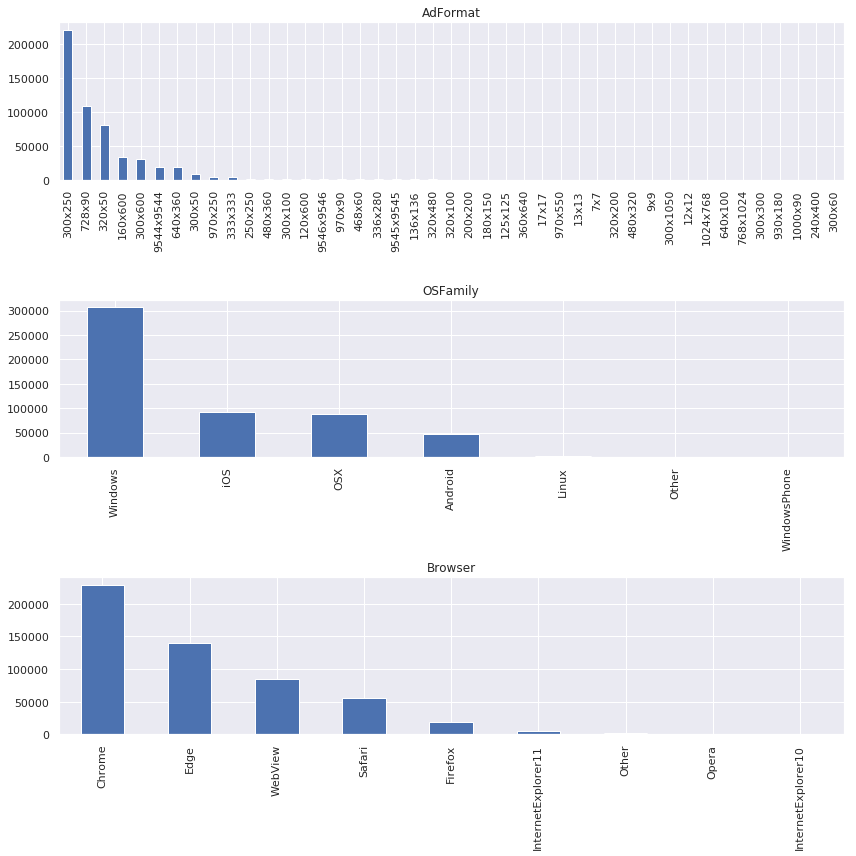

In [19]:
# Plot value counts for the categorical features to be binned
fig, axs = plt.subplots(3, 1)

cols_bin = ['AdFormat', 'OSFamily', 'Browser']

for i, col in enumerate(cols_bin):
    df[col].value_counts().plot.bar(figsize=(12, 12), ax=axs[i]);
    axs[i].set_title(col)
fig.tight_layout()

 
- **Bin:**
    - `AdFormat`: has over 40 distinct values, and we can identify the most popular formats and bin out the others
    - `OSFamily`, `Browser`: can probably focus on the dominant OS and browser, and bin the rest under `Other`


In [20]:
# Bin selected categorical features
for col in cols_bin:
    top4 = df[col].value_counts().head(4).index.tolist()
    df[col + '_bin'] = np.where(df[col].isin(top4), df[col], 'other')


In [21]:
# Redefine categorical feature list
[cols_cat.remove(x) for x in cols_bin]
cols_cat += [x for x in df if '_bin' in x]
cols_cat

['DeviceType',
 'RenderingContext',
 'LogEntryTime_hour',
 'LogEntryTime_weekday',
 'AdFormat_bin',
 'OSFamily_bin',
 'Browser_bin']

- **Convert to numerical:**
    - `LogEntryTime_hour`: create numerical version using sin and cosine functions


In [22]:
# Hours numbered 0-23
df['LogEntryTime_hour_sin'] = np.sin(df['LogEntryTime_hour'] * (2. * np.pi / 24))
df['LogEntryTime_hour_cos'] = np.cos(df['LogEntryTime_hour'] * (2. * np.pi / 24))

In [23]:
# Redefine feature lists
cols_cat.remove('LogEntryTime_hour')
cols_cat

['DeviceType',
 'RenderingContext',
 'LogEntryTime_weekday',
 'AdFormat_bin',
 'OSFamily_bin',
 'Browser_bin']

In [24]:
cols_num += ['LogEntryTime_hour_sin', 'LogEntryTime_hour_cos']
cols_num

['WinningPriceCPMInBucks',
 'TemperatureInCelsius',
 'LogEntryTime_hour_sin',
 'LogEntryTime_hour_cos']

In [25]:
# Show which cols will be used
cols_x = [x for x in df if x not in set([x for x in df]) - set(cols_num + cols_cat)]
cols_x

['WinningPriceCPMInBucks',
 'DeviceType',
 'RenderingContext',
 'TemperatureInCelsius',
 'LogEntryTime_weekday',
 'AdFormat_bin',
 'OSFamily_bin',
 'Browser_bin',
 'LogEntryTime_hour_sin',
 'LogEntryTime_hour_cos']

In [26]:
# Show which cols not used
set([x for x in df]) - set(cols_num + cols_cat)

{'AdFormat',
 'BidFeedbackId',
 'Browser',
 'CreativeId',
 'LogEntryTime',
 'LogEntryTime_hour',
 'OS',
 'OSFamily',
 'Organization',
 'ReferrerCategories',
 'TDID',
 'site'}

### Missing values

In [27]:
# Percentage of data missing for used columns, sorted from highest to lowest
(df[cols_num + cols_cat].isnull().sum().sort_values(ascending=False) / df.shape[0])*100


TemperatureInCelsius      66.01692
Browser_bin                0.00000
OSFamily_bin               0.00000
AdFormat_bin               0.00000
LogEntryTime_weekday       0.00000
RenderingContext           0.00000
DeviceType                 0.00000
LogEntryTime_hour_cos      0.00000
LogEntryTime_hour_sin      0.00000
WinningPriceCPMInBucks     0.00000
dtype: float64

* Normally if the missing values were few we could do with dropping the rows, but in this case this would mean wipping out over 60% of the dataset due to `TemperatureInCelsius`. So I think it is worth it to addressing this now. 


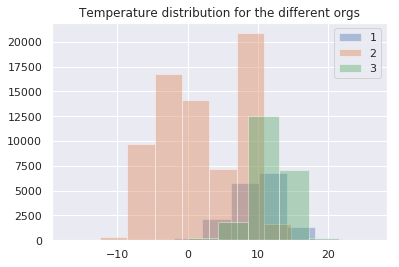

In [28]:
# Plot temperature distribution by known org
legend = []
for org in ['1', '2', '3']:
    df[df['Organization'] == org]['TemperatureInCelsius'].hist(alpha=0.4);
    legend += [org]
plt.legend(legend);
plt.title('Temperature distribution for the different orgs');

In [56]:
# Create handy mask to remove '???' cases from df
mask_unknown = ~(df['Organization'] == '???')

In [30]:
# Get temperature stats by org
df[mask_unknown].groupby('Organization')['TemperatureInCelsius'].describe()

,count,mean,std,min,25%,50%,75%,max
Organization,,,,,,,,
1,16509.0,9.865413,3.682830,-13.93,7.33,10.20,12.53,26.17
2,70654.0,1.847491,5.686648,-16.39,-2.89,1.15,7.52,22.59
3,22064.0,11.871267,2.858599,-17.20,10.56,12.05,13.63,25.88


In [31]:
# Get also the temperature median, which is less sensitive to outliers
df[mask_unknown].groupby('Organization')['TemperatureInCelsius'].median()

Organization
1    10.20
2     1.15
3    12.05
Name: TemperatureInCelsius, dtype: float64

* There are different techniques to handle missing data, such as imputing  based on the mean. Above results indicate that we can impute the missing values of temperature with the mean of each of the orgs (or median). This is a good assumption given that we know the data is just an extract from February 2019, so we don't expect massive changes in mean temperature within the same month


* Again I will do this on the _whole dataset_, which will again introduce **data leakage** as with outlier removal above. Definitely in a future version ofthe model this should be corrected for 

In [32]:
# Impute the temperature by using the mean for each org
# TODO: correct data leakage and apply only to train set
df['TemperatureInCelsius_imp'] = np.where(df['TemperatureInCelsius'].isnull(), df.groupby('Organization')['TemperatureInCelsius'].transform('mean'), df['TemperatureInCelsius'])


In [33]:
# Redefine numerical feature list
[cols_num.remove(x) for x in ['TemperatureInCelsius']]
cols_num += ['TemperatureInCelsius_imp']
cols_num

['WinningPriceCPMInBucks',
 'LogEntryTime_hour_sin',
 'LogEntryTime_hour_cos',
 'TemperatureInCelsius_imp']

In [34]:
# Check again missing values
df[cols_num + cols_cat].isnull().sum().sort_values(ascending=False)


Browser_bin                 0
OSFamily_bin                0
AdFormat_bin                0
LogEntryTime_weekday        0
RenderingContext            0
DeviceType                  0
TemperatureInCelsius_imp    0
LogEntryTime_hour_cos       0
LogEntryTime_hour_sin       0
WinningPriceCPMInBucks      0
dtype: int64

## EDA

### Organization size

Before we start the Exploratory Data Analysis, it's worth seeing the class distribution for the target. This could also be an indication of org size - a larger org means more users


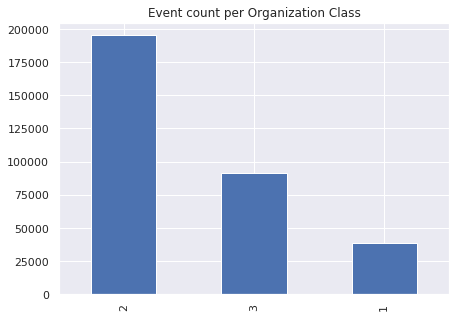

In [57]:
# Plot event counts per each Organization class to assess imbalance
df[mask_unknown]['Organization'].value_counts().plot.bar(figsize=(7, 5));
plt.title('Event count per Organization Class');

* Clearly we are dealing with an imbalanced dataset, where Org 2 has a lot more examples than 1 and 3. This could mean that Org 2 is bigger in size as an organization

### Time

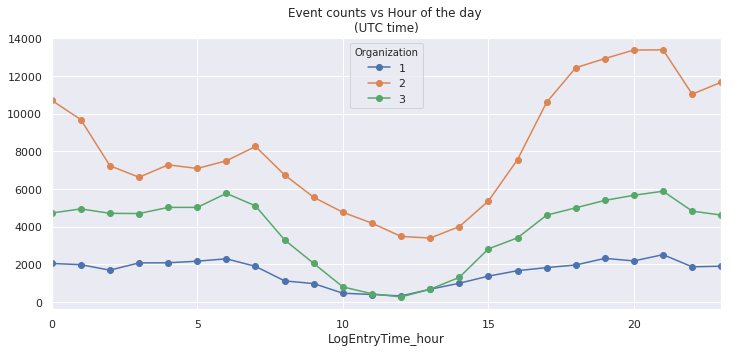

In [36]:
# Plot event counts vs time per organization

df[mask_unknown].groupby(['LogEntryTime_hour', 'Organization'])['LogEntryTime_hour'].count().unstack().plot(figsize=(12, 5), marker='o');
plt.title('Event counts vs Hour of the day \n(UTC time)');


* Similar cyclic pattern for **hour of the day** across the 3 orgs, except that Org 2 seems to have a slight offset. This hints that these could be in similar timezones

* Data definition says time is in UTC. We see a peak around 20 hrs, then picking up again between 0-3 hrs and having a min betwen 10-15 hrs. This of course doesn't make sense, as we expect peaks around lunch time and/or evening, which is when people could normally see Ads (in between work) and then a drop in activity during the night (when everyone is sleeping!)


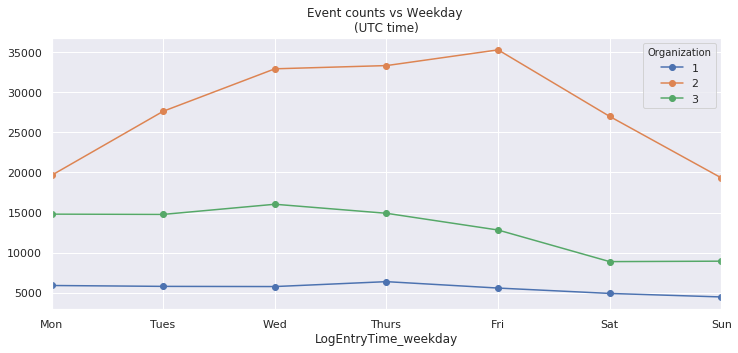

In [37]:
# Same plot but now by weekday
weekly_ticks = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
ax1 = df[mask_unknown].groupby(['LogEntryTime_weekday', 'Organization'])['LogEntryTime_weekday'].count().unstack().plot(figsize=(12, 5), marker='o')
ax1.set_xticklabels(weekly_ticks);
plt.title('Event counts vs Weekday \n(UTC time)');


* For **day of the week**, similar to above, we see Org 2 being more different than 1 and 3. For all, Ad displaying is lowest during the weekend.


**Converting to a different timezone**

* Let's make a guess and say all orgs are all the US West Coast, say San Francisco, and check if this would make sense. During February, UTC is behind SF by 8 hours (PST timezone). So let's convert the timestamp to PST time and see if the results make more sense:

In [38]:
%%time

# Convert from UTC to PST timezone
df['LogEntryTime_sf'] = df['LogEntryTime'].apply(lambda x: x.tz_localize('utc').tz_convert('US/Pacific'))

# Derive again time features
df['LogEntryTime_sf_hour'] = df['LogEntryTime_sf'].apply(lambda x: x.hour)
df['LogEntryTime_sf_weekday'] = df['LogEntryTime_sf'].apply(lambda x: x.dayofweek)

CPU times: user 18.5 s, sys: 418 ms, total: 19 s
Wall time: 23.6 s


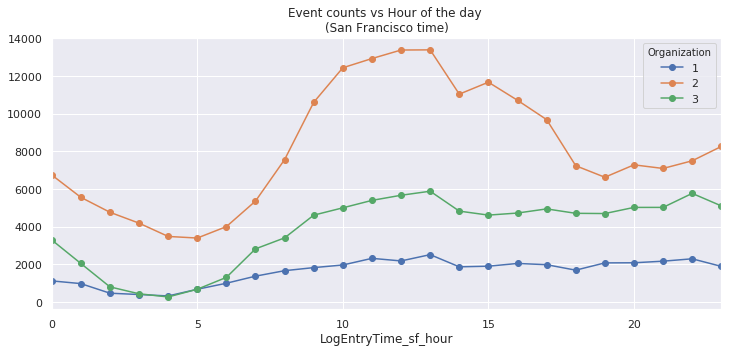

In [39]:
# Plot again wqith new timezone
df[mask_unknown].groupby(['LogEntryTime_sf_hour', 'Organization'])['LogEntryTime_sf_hour'].count().unstack().plot(figsize=(12, 5), marker='o');
plt.title('Event counts vs Hour of the day \n(San Francisco time)');

* I guess this now looks more like what we expect? It's hard to guess whethere Ad activity is higher in midday (during work) vs evening (after work). With this timezone conversion, the peak is around midday, and it only picks up slightly towards the evening. It's reassuring to see low activity during the night/early morning though. 

* However, note  how the pattern of Org 2 seems to occur a bit latter than for  1 and 3. This probably means that Org 2 is in a different location to 1 and 3 but let's check other columns

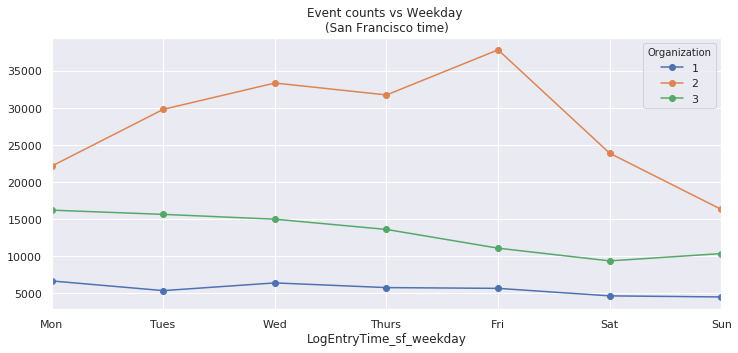

In [40]:
# Same plot but now by weekday
weekly_ticks = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
ax1 = df[mask_unknown].groupby(['LogEntryTime_sf_weekday', 'Organization'])['LogEntryTime_sf_weekday'].count().unstack().plot(figsize=(12, 5), marker='o')
ax1.set_xticklabels(weekly_ticks);
plt.title('Event counts vs Weekday \n(San Francisco time)');


* This plot doesn't change much after convering the timezone

* Worth to note that overall Org 1 and 3 have more similar weekly and hourly profiles than 2. Could it be that this is the college? We know there's only 1 college and 2 companies

### Temperature

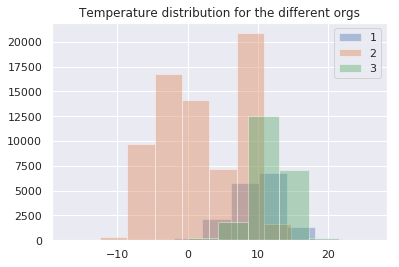

In [41]:
# Plot temperature distribution by known org
legend = []
for org in ['1', '2', '3']:
    df[df['Organization'] == org]['TemperatureInCelsius'].hist(alpha=0.4);
    legend += [org]
plt.legend(legend);
plt.title('Temperature distribution for the different orgs');

* From the [#Missing-values](#Missing-values) section, we already saw that the temperature distribution varies across orgs, and similar to the time patterns above, Org 1 and 3 are more similar than 2. This is hence additional evidence that Org 2 must be in a different location to 1 and 3. This likely is higher in latitude as the mean temperature is significantly colder, with a median of ~1 d.C. A bit of research in google, I see the average temperature in San Francisco are between 9 and 16 d.C, which agrees with Orgs 1 and 3 means, but not so for Org 2


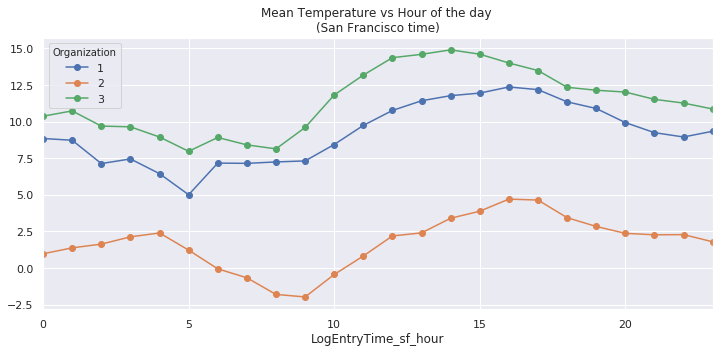

In [42]:
# Plot temperature vs hour of the day by org
df[mask_unknown].groupby(['LogEntryTime_sf_hour', 'Organization'])['TemperatureInCelsius'].mean().unstack().plot(figsize=(12, 5), marker='o');
plt.title('Mean Temperature vs Hour of the day \n(San Francisco time)');


* Another good plot is temperature vs hour of the day - as expected, it cools down at night and warms up through the day

* Here we note again the offset of Org 2 relative to 1 and 3. The max and min in temperature occur later in the day for Org 2, so this is more evidence that this Org is further east



### OS Family and Device Type

Let's see if we can infer the company names from these attributes -  we expect Google employees more on Android phones, Apple emlpoyees on iPhones, students at the college on cheaper Android devices


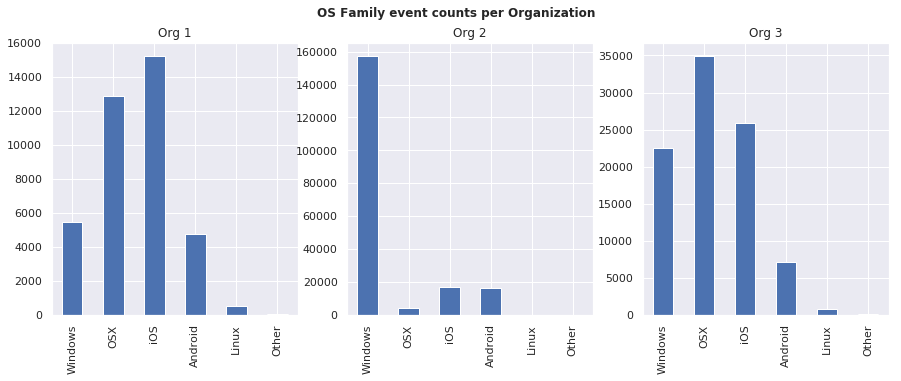

In [50]:
# Plot value counts for OSFamily per Org separately to be more comparable against each other
fig, axs = plt.subplots(1, 3)

os_order = ['Windows', 'OSX', 'iOS', 'Android', 'Linux', 'Other']

for i, org in enumerate(['1', '2', '3']):
    # Plot in same order to allow easier comparison
    df[df['Organization'] == org]['OSFamily'].value_counts()[os_order].plot.bar(figsize=(15, 5), ax=axs[i])
    axs[i].set_title('Org ' + org)

# fig.tight_layout()
fig.suptitle('OS Family event counts per Organization', fontweight='bold');

* **Org 1:** higher proportion of Apple devices (OSX and iOS), but also some on Windows and Android. This could hint at perhaps either Apple or Facebook? 

* **Org 2:** a clear majority of Windows devices, and also relative to the total Org count it is the biggest, so it could hint at a big company running Windows such as Microsoft?

* **Org 3:** no OS is super dominant, so this could be maybe the college, as we expect them to have bought their own devices, rather than use the device brand used in the company? As we know 1 and 3 are in a similar location, my wild guess is Stanford University!


* I don't see a peak in Android devices for any of the orgs as I would expect if any of them was Google :)

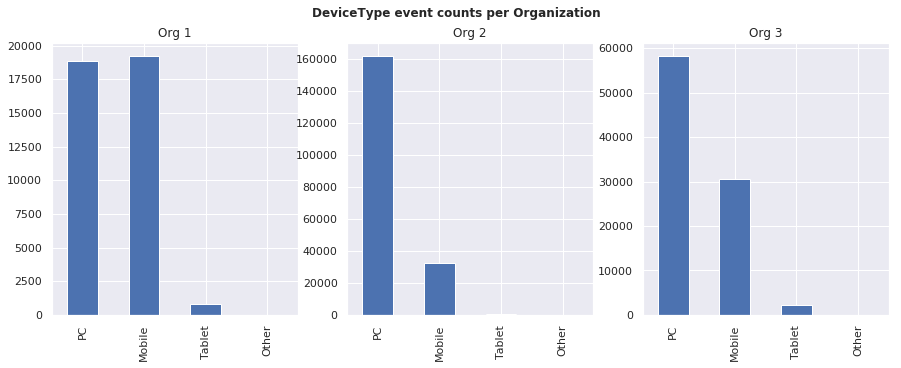

In [49]:
# Plot value counts for DeviceType per Org separately to be more comparable against each other
fig, axs = plt.subplots(1, 3)

os_order = ['PC', 'Mobile', 'Tablet', 'Other']

for i, org in enumerate(['1', '2', '3']):
    # Plot in same order to allow easier comparison
    df[df['Organization'] == org]['DeviceType'].value_counts()[os_order].plot.bar(figsize=(15, 5), ax=axs[i])
    axs[i].set_title('Org ' + org)

# fig.tight_layout()
fig.suptitle('DeviceType event counts per Organization', fontweight='bold');

* A bit puzzling results: Org 2 has mainly PCs, which is unexpected for a tech company (high income earners means users likely have a mobile)
* Org 1 has an equal share between PC and Mobile


### My Guess

Based on above data, here are my wild guesses:


| Organization | My guess            |
|--------------|---------------------|
| 1            | Facebook (company)  |
| 2            | Microsoft (company) |
| 3            | Stanford (college)  |

* **Organization size:** it was difficult to know if the event counts per Org are representative of the company size. From some research Stanford has a college population of ~17k, whereas the companies have employee populations of Microsoft=135k, Apple=132k and Facebook=30k. So my guess is consitent with Org 2 but not perhaps with 1 and 3 in this regard as this would mean Stanford is bigger than Facebook

* **Time:** Org 2 seems to be more on east than 1 and 2. From research, Microsoft's headquarters are in Redmond, which would be consistent with the data

* **OS Family and Device type:** Microsoft is consistent with Org 2 data being dominated by Windows OS but perhaps a bit puzzling to see such few users on Mobile
    
Given the time constrains, I don't have time to look at the other columns to validate further the above, but this would be great to do for future work!


# Task 2 - Predicting Organisation Class


**Question 2** - "For the users where we have not exposed their grouping (i.e. “???”), can you develop a model to
predict which of the 3 organizations they belong to? (i.e. build a model to predict which of the 3
organizations you think each user is associated to)"

**Approach** - Looking at the target `Organization`, this can be framed as a multiclass classification problem. There are many approaches to model this, see for example https://en.wikipedia.org/wiki/Multiclass_classification and  https://scikit-learn.org/stable/modules/multiclass.html. In the interest of time, we are going to take a very simple approach:

- Use the same dataset defined above without any further feature engineering
- Transform the dataset into a feature matrix $X$ by **one-hot encoding** the categorical features
- Use a single model which is inherently multiclass. I chose here a **Decision Tree classifier**. Future work could involve trying different models
- We will use a simple 80-20 split for train and test respectively and assess performance on the test set. For this we will use only the rows where the org class is defined
- If the model turns out good, we will use this to predict the class for the '???' cases

## Feature matrix

In [107]:
cols_num

['WinningPriceCPMInBucks',
 'TemperatureInCelsius_imp',
 'LogEntryTime_hour_sin',
 'LogEntryTime_hour_cos']

In [108]:
cols_cat

['DeviceType',
 'RenderingContext',
 'AdFormat_bin',
 'OSFamily_bin',
 'Browser_bin',
 'LogEntryTime_weekday']

In [119]:
# Show which cols not used
set([x for x in df]) - set(cols_num + cols_cat)

{'AdFormat',
 'BidFeedbackId',
 'Browser',
 'CreativeId',
 'LogEntryTime',
 'LogEntryTime_hour',
 'LogEntryTime_sf',
 'LogEntryTime_sf_hour',
 'LogEntryTime_sf_weekday',
 'OS',
 'OSFamily',
 'Organization',
 'ReferrerCategories',
 'TDID',
 'TemperatureInCelsius',
 'site'}

In [120]:
# Show which cols will be used
cols_x = [x for x in df if x not in set([x for x in df]) - set(cols_num + cols_cat)]
cols_x

['WinningPriceCPMInBucks',
 'DeviceType',
 'RenderingContext',
 'LogEntryTime_weekday',
 'AdFormat_bin',
 'OSFamily_bin',
 'Browser_bin',
 'LogEntryTime_hour_sin',
 'LogEntryTime_hour_cos',
 'TemperatureInCelsius_imp']

In [121]:
len(cols_x)

10

In [118]:
# # Just to be safe, ensure the columns are these after tydying the notebook
# cols = ['WinningPriceCPMInBucks',
#  'TemperatureInCelsius_imp',
#  'LogEntryTime_hour_sin',
#  'LogEntryTime_hour_cos',
#  'DeviceType',
#  'RenderingContext',
#  'AdFormat_bin',
#  'OSFamily_bin',
#  'Browser_bin',
#  'LogEntryTime_weekday']

**One-hot Encoding**

In [109]:
# Define feature matrix object from numerical features first
X = df[cols_num].copy()

# One-hot encode all the categorical + time features, which we have dimensionality reduced above
for col in cols_cat:
    X = X.join(pd.get_dummies(df[col], prefix=col))

X.shape

(536876, 34)

In [110]:
X.head()

,WinningPriceCPMInBucks,TemperatureInCelsius_imp,LogEntryTime_hour_sin,LogEntryTime_hour_cos,DeviceType_ConnectedTV,DeviceType_Mobile,DeviceType_Other,DeviceType_PC,DeviceType_Tablet,RenderingContext_InApp,...,Browser_bin_Safari,Browser_bin_WebView,Browser_bin_other,LogEntryTime_weekday_0,LogEntryTime_weekday_1,LogEntryTime_weekday_2,LogEntryTime_weekday_3,LogEntryTime_weekday_4,LogEntryTime_weekday_5,LogEntryTime_weekday_6
0,0.648104,4.792072,-0.866025,-0.500000,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
1,1.538137,9.865413,-0.258819,0.965926,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,5.038000,12.150000,0.000000,1.000000,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.506000,4.792072,-0.965926,0.258819,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0.936605,11.871267,-0.500000,0.866025,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


## Correlations

Let's now try to see how the variables correlate to the target and draw a heatmap to see this visually:

In [111]:
# Only use labeled examples for this
mask_unknown = df['Organization'] != '???'

In [112]:
# First get dummies of multiclass target
target = 'Organization'
df_y = pd.get_dummies(df[mask_unknown][target], prefix=target)

# Then join to rest of the feature matrix X and get pearson's correlation
# Only use labeled examples for this
temp = X[mask_unknown].join(df_y)

corr = temp.corr()

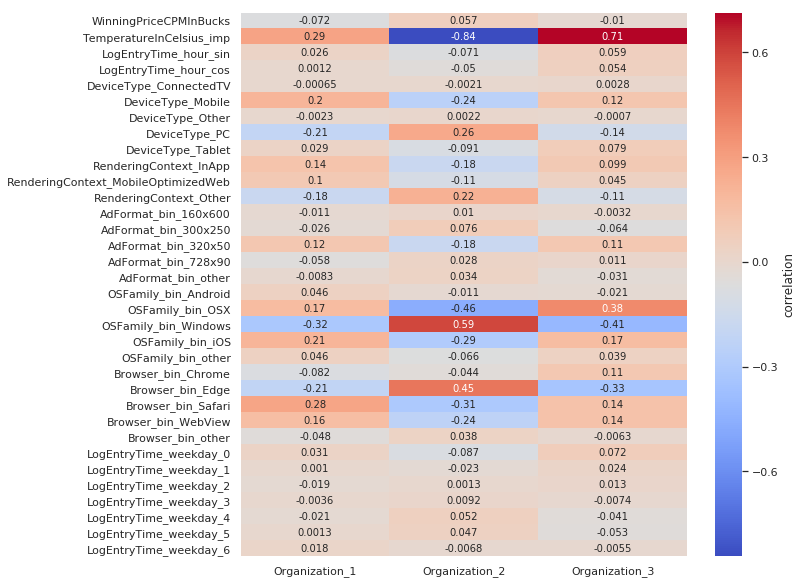

In [113]:
# Correlation heatmap
fig, ax = plt.subplots(figsize=(10,10));
sns.heatmap(corr[df_y.columns].iloc[:-3, :],  ax=ax,  cmap="coolwarm", cbar_kws={'label': 'correlation'}, annot=True);


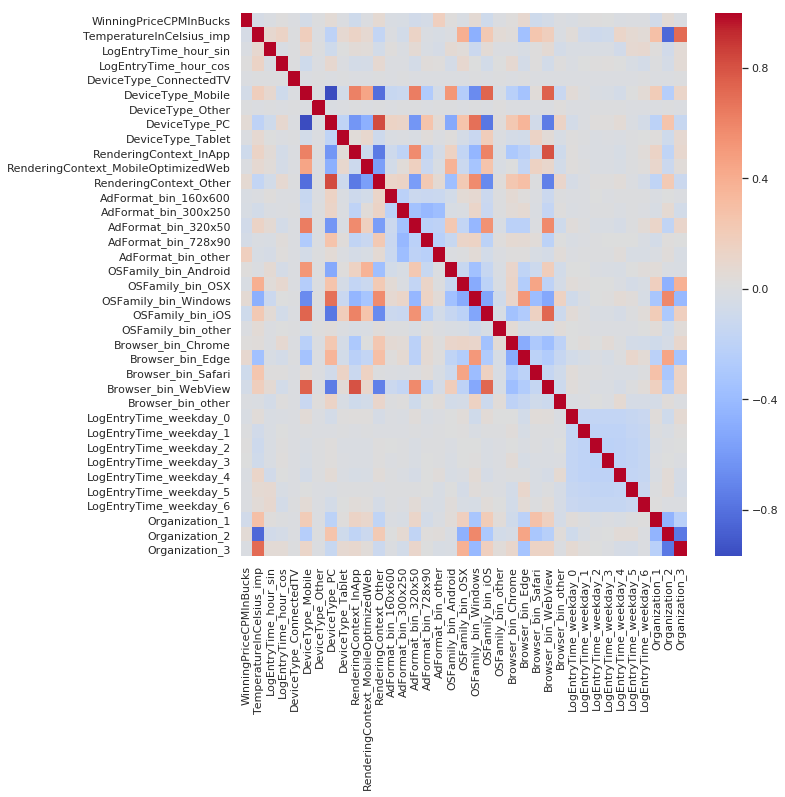

In [114]:
fig, ax = plt.subplots(figsize=(10,10));
sns.heatmap(corr,  ax=ax,  cmap="coolwarm");

A few interesting conclusions can be made from the above correlation heatmap:

* Temperature is highly correlated to the target, and it could be we only need this variable to get a reasonable predictor model as we have some good differentiation across the classes, e.g. Orgs 1 and 3 have positive corr to temp, whereas Org 3 is negative corr


* We also see strong correlations vs the OSFamily, as well as Browser. However, we also see **collinearity** - high correlation between features, e.g. `OSFamily_bin_Windows` is very correlated to PC devices and Edge browsers. Collinearity typically requires some degree of regularisation in the modelling stage, but we will not do this here - see future work section.

## Model Evaluation

As mentioned above, we will be using only a Decision Tree Classifier to evaluate the model. Let's first separate the unknown classes from the training and test sets.

In [123]:
# Separate the unknown classes from the training and test sets
X_unknown = X[~mask_unknown]
X_unknown.shape

(211846, 34)

In [128]:
df.loc[X_unknown.index, 'Organization'].unique()

array(['???'], dtype=object)

In [129]:
X_known = X[mask_unknown]
X_known.shape

(325030, 34)

In [130]:
y_known = df[mask_unknown]['Organization']
y_known.shape

(325030,)

In [131]:
np.unique(y_known)

array(['1', '2', '3'], dtype=object)

## Using all features

In [145]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=0)

# split the data with 80% in each set
X_train, X_test, y_train, y_test = train_test_split(X_known, y_known, random_state=0, train_size=0.8)

# fit the model on one set of data
model.fit(X_train, y_train)

# evaluate the model on the second set of data
y_pred = model.predict(X_test)


/Users/tsando/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


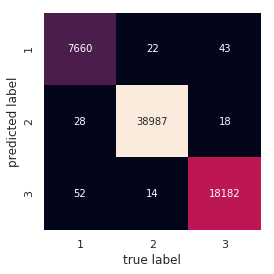

In [146]:
# Plot confusion matrix heatmap to evaluate how good our model is
from sklearn.metrics import confusion_matrix

labels = np.sort(np.unique(y_test))
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=labels,
            yticklabels=labels)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [147]:
from sklearn.metrics import precision_recall_fscore_support

# Calculate performance metrics using micro averaging over the classes
precision_recall_fscore_support(y_test, y_pred, average='micro')

(0.9972771744146695, 0.9972771744146695, 0.9972771744146695, None)

In [148]:
# Same as above but using a different kind of averaging
precision_recall_fscore_support(y_test, y_pred, average='weighted')

(0.9972756923281132, 0.9972771744146695, 0.9972763073152796, None)

In [149]:
# Show performance metrics per individual class
pd.DataFrame(data=precision_recall_fscore_support(y_test, y_pred), columns=['Org 1', 'Org 2', 'Org 3'], 
             index=['Precision', 'Recall', 'F1', 'Support']).T

,Precision,Recall,F1,Support
Org 1,0.991586,0.989664,0.990624,7740.0
Org 2,0.998822,0.999077,0.998949,39023.0
Org 3,0.996383,0.996656,0.996520,18243.0


## Too good to be true?

* Overall it is a surprinsingly strong performance across the orgs and metrics and perhaps too good to be true? We should probably check if some overfitting or snoop bias took place. It could be due to the way the samples were split migth have introduced some snoop bias, as we know we have repeated users in the data... Also we should probably investigate the reshuffling during the test-train split
* One quick check would be to use a 5-fold cross-validation and check whether performance looks the constant accross each split. If it fluctuates a lot, then that could be an indication of a bias. Another quick check is to get the performance vs the truth of the '???' cases
* Interesting to see however that performance is slightly better for the majority class (Org 2)

**_Due to time constrains, we will proceed with this model without doing the checks above_**


## Predicting unkown samples


In [150]:
# Predict classes for the cases with '???'
y_unknown_pred = model.predict(X_unknown)

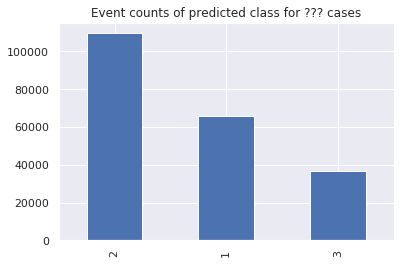

In [152]:
pd.Series(y_unknown_pred).value_counts().plot.bar();
plt.title('Event counts of predicted class for ??? cases');

In [156]:
# Result
df_unknown_pred = pd.DataFrame({'TDID': df.loc[X_unknown.index, 'TDID'], 'Organization': y_unknown_pred})
df_unknown_pred.head()

,TDID,Organization
0,4036417920015424099,3
2,9054625594690950326,2
3,7591148781420240646,3
6,6540069944952490877,2
7,2741112046343910179,2


## Aside: Comparison using Temperature only

Given the high correlations of Temperature with the target, I have reason to believe a model using only temperature could be good enough. Let's check this

In [139]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=0)

# split the data with 80% in each set
X_train, X_test, y_train, y_test = train_test_split(X_known[['TemperatureInCelsius_imp']], y_known, random_state=0, train_size=0.8)

# fit the model on one set of data
model.fit(X_train, y_train)

# evaluate the model on the second set of data
y_pred = model.predict(X_test)


/Users/tsando/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


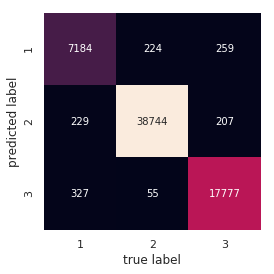

In [141]:
# Plot confusion matrix heatmap to evaluate how good our model is
from sklearn.metrics import confusion_matrix

labels = np.sort(np.unique(y_test))
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=labels,
            yticklabels=labels)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [144]:
# Show performance metrics per individual class
pd.DataFrame(data=precision_recall_fscore_support(y_test, y_pred), columns=['Org 1', 'Org 2', 'Org 3'], 
             index=['Precision', 'Recall', 'F1', 'Support']).T

,Precision,Recall,F1,Support
Org 1,0.937003,0.928165,0.932563,7740.0
Org 2,0.988872,0.992850,0.990857,39023.0
Org 3,0.978964,0.974456,0.976705,18243.0


* We certainly see a degradation in performance, but not by much actually... Temperature seems to be a pretty good predictor for Org class! :)

# Task 3 - Prioritising marketing efforts

The tech companies are both recruiting heavily from the college campus. They want to know which users they should prioritize in their recruiting efforts. Can you pitch us on a method/model to prioritize users for each tech company? 

- What can we get out the door in a week or two? 
- What if we had more time, what would your dream model look like? 
- Will your proposal scale?

-----------

**Note:** Given time constrains, I do not have time to prepare a presentation or draft for this, so I will just outline some points about how I would go about it.

## Hypothesis 1 - no additional data

Assuming we have no other data features available other than in the sample dataset: 

- By finding 'like-minded' candidates, companies can increase their chances of candidates becoming successfull employees (and also passing interview loops). Hence the tech companies should target college students that are similar to their own current workforce


- We could do this by developing a clustering model that assigns each college student to one of the 2 companies clusters (based on minimising the embedding distance). Want to find similarities to both 'tech clusters' for each data point in college organization (= students)


- We could then rank the college students in order by how similar they are to each respective tech company 'cohort' and bid in proportion to the cluster proximity (e.g. big higher on closer matches)

 

## Hypothesis 2 - additional data

Assuming we could have access to additional data attributes such as **Ad clicks or conversions** (in the latter case, this could mean that e.g. the click resulted in an actual job application):

- We could focus our bidding budget on college students with the highest probability of click/conversion


-  For this I would build a simple logistic regression fitted to the data, where the target is binary (whether customer clicked/converted on the Ad or not)


- Within this approach, we could take several bidding strategies. For example, we could bid bid in proportion to the probability of clicking/converting


- We could optimise the model in more complex metrics, such as whether the candidate resulted in a job offer true/false


# Future Work

Probably the most important would be to investigate the too-good-to-be-true performance of the predictive model developed above (to predict organisation name). 

The next priority would be to investigate potential of columns dropped: e.g.  `site` was dropped and potentially included very useful signal - e.g. we expect more `.edu` sites to be dominating the data from the college users more than for the tech companies users



Some other suggestions for future work:

- Fix data leakage discussed above - from outlier removal, temperature imputing and binning of some categorical features. The correct way should be to do it only on the train set, and apply the obtained inferences from the train set on the test set

- Investigate validity of outlier removal and imputing techniques. Investigate alternative techniques

- Understand feature importance - what's drying model performance? This could've been quite easy to obtain from sklearn's DecisionTree model object

- Investigate alternative predictive models other than DTC

- Class rebalancing - as we know the dataset is imbalanced, we can always improve performance by rebalacing the classes